In [100]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import gc

from matplotlib import rcParams
# rcParams['axes.titlepad'] = 12
rcParams['font.weight'] ='bold'
rcParams['legend.fontsize'] = 16

In [107]:
delhi_data = pd.ExcelFile("../data/final_trends_data.xlsx").parse("nagpur")

In [102]:
delhi_data

year month  no_of_DT_days  no_of_valid_days  percentage
0   1987   Mar              1                42    2.380952
1   1991   Mar              4                40   10.000000
2   1991   May              1                33    3.030303
3   1991   Oct              4                36   11.111111
4   1991   Dec              7                39   17.948718
5   1992   Jan              8                33   24.242424
6   1992   Feb              2                31    6.451613
7   1992   Mar              4                39   10.256410
8   1993   May              1                45    2.222222
9   1993   Jun              4                37   10.810811
10  1993   Nov              4                33   12.121212
11  1994   Jan              3                37    8.108108
12  1994   Mar              4                32   12.500000
13  1994   Jul              3                36    8.333333
14  1994   Aug              5                38   13.157895
15  1994   Oct              1                33    3.030303
16  1995   May              3                36    8.333333
17  1995   Jun              5                34   14.705882
18  1997   Apr              3                31    9.677419
19  1997   Aug              4                31   12.903226
20  1997   Oct              4                41    9.756098
21  1997   Nov              4                44    9.090909
22  1998   Jan             12                36   33.333333
23  1998   Feb              3                38    7.894737
24  1998   Mar              8                42   19.047619
25  1998   Apr              4                32   12.500000
26  1998   May              4                33   12.121212
27  1998   Jun              6                35   17.142857
28  1998   Jul              4                36   11.111111
29  1998   Aug              2                43    4.651163
..   ...   ...            ...               ...         ...
48  2000   Dec              5                46   10.869565
49  2001   Jan              2                32    6.250000
50  2001   Feb              6                32   18.750000
51  2001   May              4                40   10.000000
52  2002   Mar              2                32    6.250000
53  2013   Aug              7                38   18.421053
54  2013   Sep             11                44   25.000000
55  2013   Oct              9                34   26.470588
56  2016   Mar              6                47   12.765957
57  2016   Apr              9                48   18.750000
58  2016   May              8                52   15.384615
59  2016   Jun             14                50   28.000000
60  2016   Jul             11                45   24.444444
61  2016   Aug             15                53   28.301887
62  2016   Sep              8                46   17.391304
63  2016   Oct              9                58   15.517241
64  2016   Nov              6                56   10.714286
65  2016   Dec              4                55    7.272727
66  2017   Jan              9                45   20.000000
67  2017   Feb              5                43   11.627907
68  2017   Mar             16                46   34.782609
69  2017   Apr              7                38   18.421053
70  2017   May             11                51   21.568627
71  2017   Jun             12                86   13.953488
72  2017   Jul              6                41   14.634146
73  2017   Aug             10                39   25.641026
74  2017   Sep              7                42   16.666667
75  2017   Oct              5                35   14.285714
76  2017   Nov              3                38    7.894737
77  2017   Dec             10                55   18.181818

[78 rows x 5 columns]

In [103]:
# equalize data from 1973 - 2017. 
# for months that failed the validity filter, insert empty data in % column

MONTHS = [
	"Jan",
	"Feb",
	"Mar",
	"Apr",
	"May",
	"Jun",
	"Jul",
	"Aug",
	"Sep",
	"Oct",
	"Nov",
	"Dec"
]

rows_list = []
for year in range(1973, 2018):
# for year in range(1991, 2018):
    for month in MONTHS:
        result = delhi_data[(delhi_data.year == year) & (delhi_data.month == month)]
        if len(result) == 0:
            temp = {}
            temp["time_label"] = month + "-" + str(year)
            temp["percentage"] = np.nan
            rows_list.append(temp)
        else:
            temp = {}
            temp["time_label"] = month + "-" + str(year)
            temp["percentage"] = float(result["percentage"])
            rows_list.append(temp)
            
plot_df = pd.DataFrame(rows_list, columns=["time_label", "percentage"])

In [104]:
plot_df

time_label  percentage
0     Jan-1973         NaN
1     Feb-1973         NaN
2     Mar-1973         NaN
3     Apr-1973         NaN
4     May-1973         NaN
5     Jun-1973         NaN
6     Jul-1973         NaN
7     Aug-1973         NaN
8     Sep-1973         NaN
9     Oct-1973         NaN
10    Nov-1973         NaN
11    Dec-1973         NaN
12    Jan-1974         NaN
13    Feb-1974         NaN
14    Mar-1974         NaN
15    Apr-1974         NaN
16    May-1974         NaN
17    Jun-1974         NaN
18    Jul-1974         NaN
19    Aug-1974         NaN
20    Sep-1974         NaN
21    Oct-1974         NaN
22    Nov-1974         NaN
23    Dec-1974         NaN
24    Jan-1975         NaN
25    Feb-1975         NaN
26    Mar-1975         NaN
27    Apr-1975         NaN
28    May-1975         NaN
29    Jun-1975         NaN
..         ...         ...
510   Jul-2015         NaN
511   Aug-2015         NaN
512   Sep-2015         NaN
513   Oct-2015         NaN
514   Nov-2015         NaN
515   Dec-2015         NaN
516   Jan-2016         NaN
517   Feb-2016         NaN
518   Mar-2016   12.765957
519   Apr-2016   18.750000
520   May-2016   15.384615
521   Jun-2016   28.000000
522   Jul-2016   24.444444
523   Aug-2016   28.301887
524   Sep-2016   17.391304
525   Oct-2016   15.517241
526   Nov-2016   10.714286
527   Dec-2016    7.272727
528   Jan-2017   20.000000
529   Feb-2017   11.627907
530   Mar-2017   34.782609
531   Apr-2017   18.421053
532   May-2017   21.568627
533   Jun-2017   13.953488
534   Jul-2017   14.634146
535   Aug-2017   25.641026
536   Sep-2017   16.666667
537   Oct-2017   14.285714
538   Nov-2017    7.894737
539   Dec-2017   18.181818

[540 rows x 2 columns]

In [105]:
plot_df.to_csv("nagpur_bestfit_plot.csv")

In [108]:
from scipy import stats
# line_df = plot_df.dropna()
index = ~np.isnan(plot_df.percentage)
slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(len(plot_df.time_label[index])), plot_df.percentage[index])

print slope
print intercept
print std_err

0.11753994175378887
8.046434891645623
0.03587437665305825


IndexError: pop from empty list

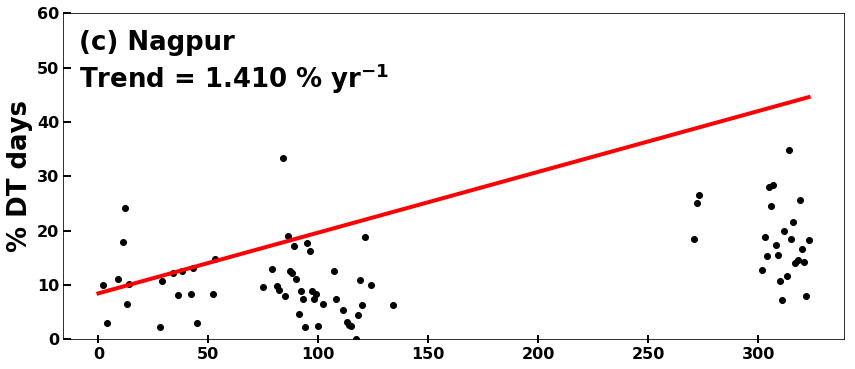

In [96]:
fig, axes = plt.subplots(figsize=(14, 6))

plt.plot(plot_df.percentage, c="black", alpha=1.0, marker='o', linestyle='none')
yfit = [(intercept + (slope * xi)) for xi in np.arange(len(plot_df.time_label))]
plt.plot(np.arange(len(plot_df.time_label)), yfit, color='red', linewidth=4)

axes.set_ylim([0,60])

axes.tick_params(axis='y', direction='in', width=2, length=8, labelsize=16, which="major")
axes.tick_params(axis='x', direction='inout', width=2, length=8, labelsize=16, which="major")
# axes.tick_params(axis='x', which='both', labelbottom='off', bottom='off')
# axes.set_xlabel("Time", fontsize=26, fontweight='bold')
axes.set_ylabel("% DT days", fontsize=26, fontweight='bold')
plt.text(0.02, 0.77, "(c) Nagpur\nTrend = 1.410 % yr$^{-1}$", horizontalalignment='left', fontsize=26,
         transform=axes.transAxes, fontweight='bold')

# get yearly time labels
years = np.arange(2017, 1992, -1)
years = years.tolist()
tick_labels = []
for i in range(325):
    if i%12 == 0:
        tick_labels.append(str(years.pop()))
    else:
        tick_labels.append('')
# axes.xaxis.set_ticks(np.arange(0, 540, 36))
axes.xaxis.set_ticks(np.arange(0, 324, 36))
# axes.set_xticklabels(np.arange(1973, 2018, 3))
axes.set_xticklabels(np.arange(1991, 2018, 3))
axes.set_xlim([0,324])


# plt.suptitle('DT Monthly Trends', fontsize=30, fontweight='bold')
plt.tight_layout()
fig.autofmt_xdate()
fig.subplots_adjust(wspace=0.40, top=0.85)
plt.savefig("../plots/dt_monthly_trend_Nagpur.png", bbox_inches='tight', pad_inches = 0.5, dpi = 200)

In [97]:
gc.collect()

14224

In [84]:
# mangalore
# guwahati
# nagpur